In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data() # MNIST: 필기 숫자 데이터셋
x_train = x_train.reshape(60000, 784) # 1차원 구조로 변환
x_test = x_test.reshape(10000, 784) # 1차원 구조로 변환
x_train = x_train.astype(np.float32)/255.0 # [0,1]로 정규화
x_test = x_test.astype(np.float32)/255.0 # [0,1]로 정규화
y_train = tf.keras.utils.to_categorical(y_train, 10) # 원핫 코드로 변환
y_test = tf.keras.utils.to_categorical(y_test, 10) # 원핫 코드로 변환

In [3]:
# 모델 선택(신경망 구조 설계)
dmlp = Sequential()
dmlp.add(Dense(units=1024, activation="relu", input_shape=(784,))) # 은닉층 노드 개수 1024 / 은닉층 활성 함수 relu / 입력층 모양
dmlp.add(Dense(units=512, activation="relu")) # 은닉층 노드 개수 512 / 은닉층 활성 함수 relu
dmlp.add(Dense(units=512, activation="relu")) # 은닉층 노드 개수 512 / 은닉층 활성 함수 relu
dmlp.add(Dense(units=10, activation="softmax")) # 출력층 노드 개수 10 / 출력층 활성 함수 softmax

c:\Users\GreenTea\anaconda3\envs\Test\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# 학습
dmlp.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"]) # CE 손실 함수 / Adam 옵티마이저 / 학습률 / 평가지표:정확도
hist = dmlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2) # 훈련 집합 / 미니 배치 크기 / 훈련횟수 / 검증 집합

Epoch 1/50
469/469 - 13s - 27ms/step - accuracy: 0.8944 - loss: 0.4067 - val_accuracy: 0.9500 - val_loss: 0.1709
Epoch 2/50
469/469 - 9s - 20ms/step - accuracy: 0.9564 - loss: 0.1470 - val_accuracy: 0.9616 - val_loss: 0.1235
Epoch 3/50
469/469 - 9s - 20ms/step - accuracy: 0.9717 - loss: 0.0986 - val_accuracy: 0.9728 - val_loss: 0.0935
Epoch 4/50
469/469 - 9s - 20ms/step - accuracy: 0.9787 - loss: 0.0715 - val_accuracy: 0.9714 - val_loss: 0.0903
Epoch 5/50
469/469 - 9s - 20ms/step - accuracy: 0.9843 - loss: 0.0540 - val_accuracy: 0.9779 - val_loss: 0.0720
Epoch 6/50
469/469 - 9s - 20ms/step - accuracy: 0.9884 - loss: 0.0404 - val_accuracy: 0.9773 - val_loss: 0.0731
Epoch 7/50
469/469 - 11s - 22ms/step - accuracy: 0.9913 - loss: 0.0311 - val_accuracy: 0.9798 - val_loss: 0.0650
Epoch 8/50
469/469 - 11s - 24ms/step - accuracy: 0.9939 - loss: 0.0229 - val_accuracy: 0.9770 - val_loss: 0.0713
Epoch 9/50
469/469 - 11s - 24ms/step - accuracy: 0.9952 - loss: 0.0184 - val_accuracy: 0.9801 - val_l

In [5]:
# 예측(성능 측정)
print("정확률=", dmlp.evaluate(x_test, y_test, verbose=0)[1]*100)

정확률= 98.40999841690063


In [6]:
# 모델 저장
dmlp.save("dmlp_trained.h5") # 비전 에이전트 제작을 위해 학습된 모델을 저장

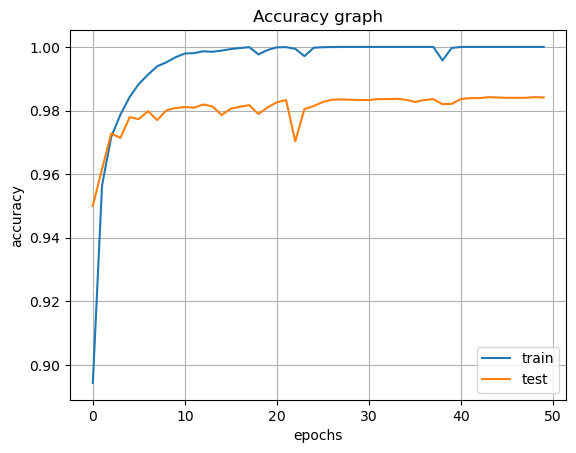

In [7]:
# 정확도 그래프 그리기
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Accuracy graph")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train", "test"])
plt.grid()
plt.show()

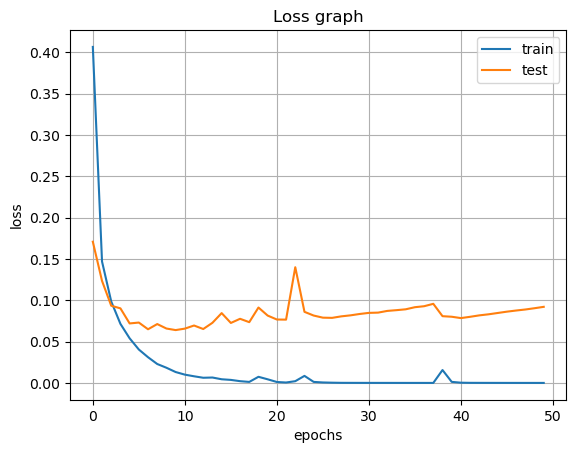

In [8]:
# 정확도 그래프 그리기
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Loss graph")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train", "test"])
plt.grid()
plt.show()